# Machine Learning
## Classification
### Data Analysis

In [48]:
import pandas as pd

In [49]:
df=pd.read_csv("../data/seismic_logdata.csv")

In [50]:
df

,Zp,LR,VpVs,MR,Den,Facies
0,7648.486328,25.445677,1.881696,16.527334,2.533731,0.0
1,7653.087891,25.703848,1.888255,16.433571,2.535888,0.0
2,7658.008301,25.963428,1.894789,16.341541,2.538084,0.0
3,7663.247559,26.224421,1.901299,16.251245,2.540319,0.0
4,7669.116211,26.502514,1.908178,16.157217,2.542726,0.0
...,...,...,...,...,...,...
2179,7692.596191,28.977602,1.979683,15.099550,2.540252,0.0
2180,7675.594727,28.721327,1.975433,15.097899,2.536184,0.0
2181,7655.220215,28.434021,1.970997,15.086118,2.531599,0.0
2182,7634.981934,28.147095,1.966542,15.075185,2.527033,0.0


In [51]:
df["Facies"].value_counts()

Facies
0.0    1274
1.0     910
Name: count, dtype: int64

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [53]:
df_data=df.copy()

<Axes: xlabel='VpVs', ylabel='Density'>

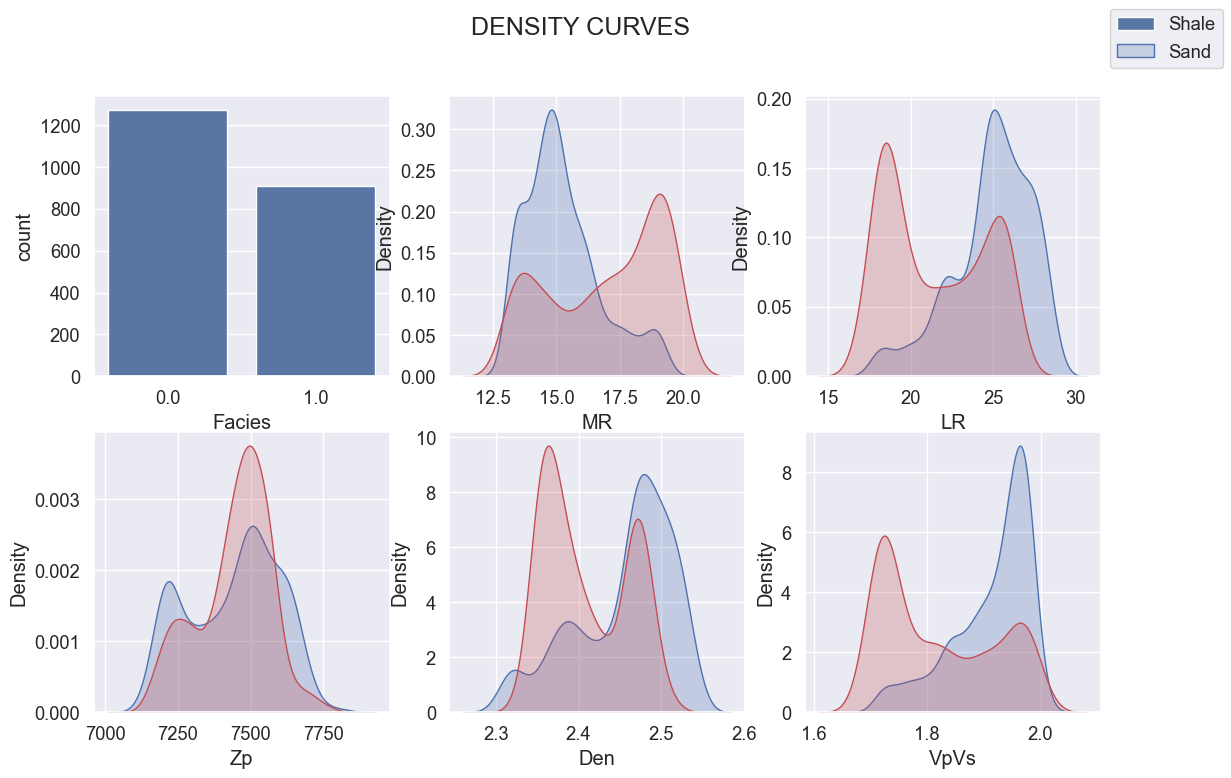

In [54]:
sns.set(font_scale=1.2)  # crazy big
fig, axs=plt.subplots(2,3, figsize=(13,8))
fig.suptitle('DENSITY CURVES',fontsize=18)
# 'font

sns.countplot(data=df_data,x='Facies',ax=axs[0,0])

sns.kdeplot(data=df_data['MR'][(df_data['Facies']==0)],fill=True, color="b",ax=axs[0,1])
sns.kdeplot(data=df_data['MR'][(df_data['Facies']==1)],fill=True, color="r",ax=axs[0,1])
# axs.legend()
fig.legend(["Shale","Sand"])
# legend(["Shale","Sand"])
# add_legend()

sns.kdeplot(data=df_data['LR'][(df_data['Facies']==0)],fill=True, color="b",ax=axs[0,2])
sns.kdeplot(data=df_data['LR'][(df_data['Facies']==1)],fill=True, color="r",ax=axs[0,2])


sns.kdeplot(data=df_data['Zp'][(df_data['Facies']==0)],fill=True, color="b",ax=axs[1,0])
sns.kdeplot(data=df_data['Zp'][(df_data['Facies']==1)],fill=True, color="r",ax=axs[1,0])

sns.kdeplot(data=df_data['Den'][(df_data['Facies']==0)],fill=True, color="b",ax=axs[1,1])
sns.kdeplot(data=df_data['Den'][(df_data['Facies']==1)],fill=True, color="r",ax=axs[1,1])

sns.kdeplot(data=df_data['VpVs'][(df_data['Facies']==0)],fill=True, color="b",ax=axs[1,2])
sns.kdeplot(data=df_data['VpVs'][(df_data['Facies']==1)],fill=True, color="r",ax=axs[1,2])

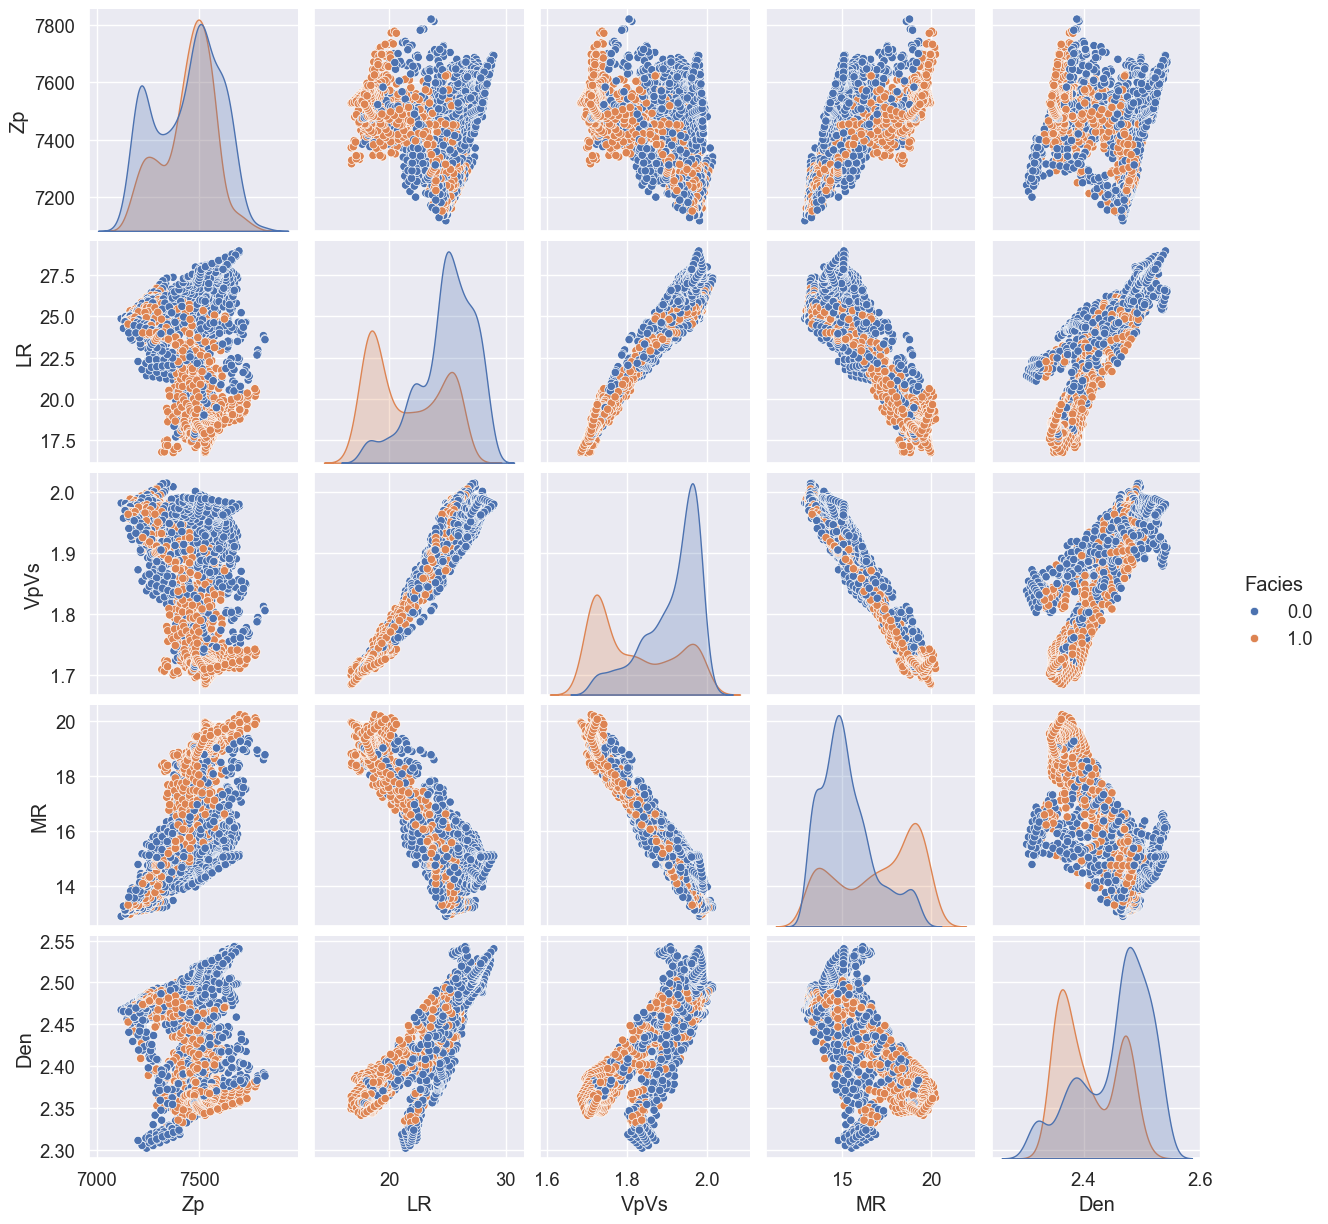

In [55]:
sns.pairplot(df,hue="Facies");

In [56]:
import numpy as np

[Text(0.5, 0, 'ZP'),
 Text(1.5, 0, 'LR'),
 Text(2.5, 0, 'VPVS'),
 Text(3.5, 0, 'MR'),
 Text(4.5, 0, 'DEN')]

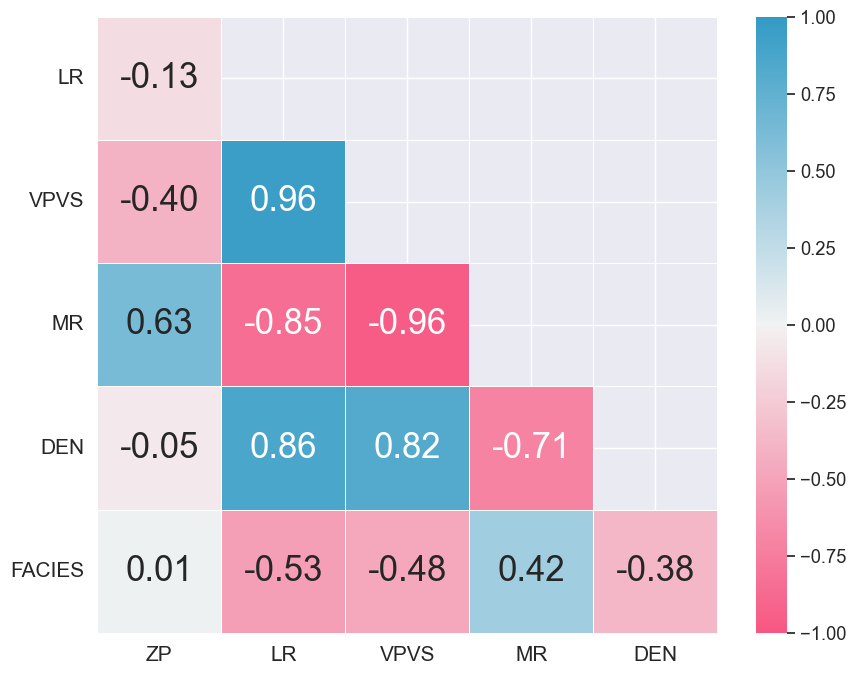

In [57]:
fg, ax=plt.subplots(figsize=(10,8))
# sns.set(font_scale=2)
# df_qc = pd.read_csv('QC_New.csv')#Seismic dat
df_qc = df_data.copy()#Seismic dat

corr_data=df_qc.corr()# for input
# corr_data=df_qc.corr() # for QC output
ones_corr=np.ones_like(corr_data,dtype=bool)
mask=np.triu(ones_corr)
# Remove first row and last col
adjusted_mask=mask[1:, :-1]
# adjusted_mask=mask

adjusted_corr_data=corr_data.iloc[1:, :-1]
# adjusted_corr_data=corr_data
# Get from Hsluv.org website

cmap=sns.diverging_palette(0,230,90,60,as_cmap=True)
sns.heatmap(data=adjusted_corr_data,mask=adjusted_mask,annot=True,annot_kws={'fontsize':25},fmt='.2f',
            cmap=cmap,vmin=-1,vmax=1,linecolor='white',linewidths=0.5)

yticks=[i.upper() for i in adjusted_corr_data.index]
xticks=[i.upper() for i in adjusted_corr_data.columns]

ax.set_yticklabels(yticks,rotation=0,fontsize=15)
ax.set_xticklabels(xticks,rotation=0,fontsize=15)

## RANDOM FOREST

### Import Library

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [61]:
df.columns

Index(['Zp', 'LR', 'VpVs', 'MR', 'Den', 'Facies'], dtype='object')

### X,y Features

In [62]:
# Select inputs and target
X = df[['LR', 'VpVs', 'MR',"Den","Zp"]]
y = df['Facies']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Learn and Predict

In [65]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred = model.predict(X_test)

### Calculate Accuracy

In [82]:
accuracy_score(y_test, y_pred)

0.7911585365853658

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       397
         1.0       0.71      0.79      0.75       259

    accuracy                           0.79       656
   macro avg       0.78      0.79      0.79       656
weighted avg       0.80      0.79      0.79       656



In [73]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[315  82]
 [ 55 204]]


In [74]:
labels = ['Shale', 'Sandstone']
labels.sort()

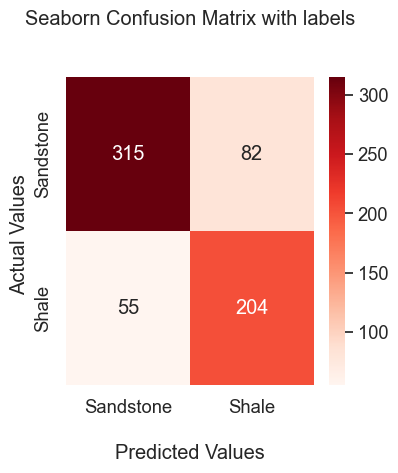

In [75]:
fig = plt.figure(figsize=(4,4))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


# Machine Learning
## Regression

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../data/volve_wells.csv', usecols=['WELL', 'DEPTH', 'RHOB', 'GR', 'NPHI', 'PEF', 'DT'])

In [27]:
df['WELL'].unique()

array(['15/9-F-11 B', '15/9-F-11 A', '15/9-F-1 B', '15/9-F-1 A'],
      dtype=object)

In [28]:
# Training Wells
training_wells = ['15/9-F-11 B', '15/9-F-11 A', '15/9-F-1 A']
# Test Well
test_well = ['15/9-F-1 B']

In [29]:
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()

In [30]:
train_val_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,116914.000000,21699.000000,115933.000000,37587.000000,37668.000000,37668.000000
mean,2154.233438,77.252247,51.823119,0.174302,6.450603,2.443072
std,1180.976133,14.350893,37.606884,0.085660,1.478121,0.166466
min,145.900000,53.165000,0.149100,0.010000,3.647000,1.627000
25%,1148.525000,66.854450,22.126100,0.115000,5.078850,2.276000
50%,2122.800000,72.724000,52.217000,0.163000,6.548700,2.501000
75%,3097.100000,86.132300,74.201000,0.212100,7.728625,2.577000
max,4770.200000,126.827000,1124.403000,0.593200,13.841000,3.090000


In [31]:
test_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,33191.000000,4262.000000,32498.000000,3413.000000,3441.000000,3441.000000
mean,1805.400000,80.380006,56.864115,0.203836,6.445014,2.453695
std,958.156073,14.698333,35.935409,0.095991,0.811407,0.129990
min,145.900000,54.928300,0.149300,0.059500,4.729900,2.111800
25%,975.650000,71.513225,29.481175,0.146900,5.938300,2.379200
50%,1805.400000,76.295350,58.005700,0.172700,6.352900,2.482100
75%,2635.150000,85.365475,79.247200,0.222300,6.872600,2.536700
max,3464.900000,125.982700,297.767300,0.557600,10.987600,3.051700


In [32]:
train_val_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_val_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000
mean,3141.098875,77.235857,39.803246,0.166648,7.093603,2.475232
std,314.723749,14.336048,57.907158,0.099200,1.188313,0.147635
min,2577.000000,53.165000,0.852000,0.010000,4.297800,1.980600
25%,2869.475000,66.849300,9.416350,0.096000,6.218475,2.379000
50%,3140.550000,72.720750,27.552000,0.136000,7.487700,2.533000
75%,3411.625000,86.093800,44.877425,0.217200,8.001000,2.581400
max,3723.300000,126.827000,1124.403000,0.593200,13.841000,3.025000


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [34]:
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']]
y = train_val_df['DT']

In [96]:
type(X)

pandas.core.frame.DataFrame

In [97]:
type(y)

pandas.core.series.Series

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [36]:
regr = RandomForestRegressor()

In [37]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
y_pred = regr.predict(X_val)

In [39]:
metrics.mean_absolute_error(y_val, y_pred)

1.6398272141539887

In [40]:
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

In [41]:
rmse

3.017682903047845

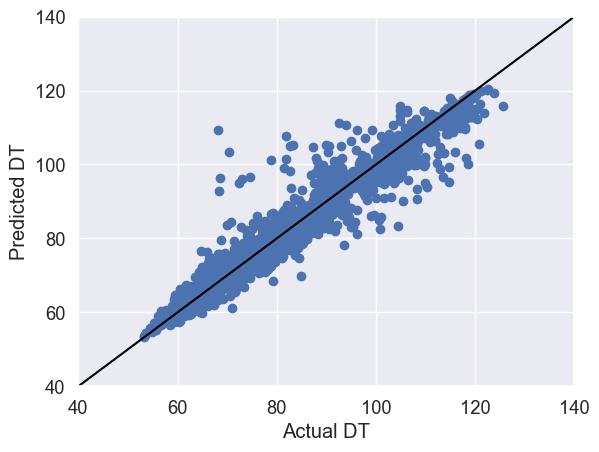

In [42]:
plt.scatter(y_val, y_pred)
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line

In [43]:
test_well_x = test_df[['RHOB', 'GR', 'NPHI', 'PEF']]

In [44]:
test_df['TEST_DT'] = regr.predict(test_well_x)

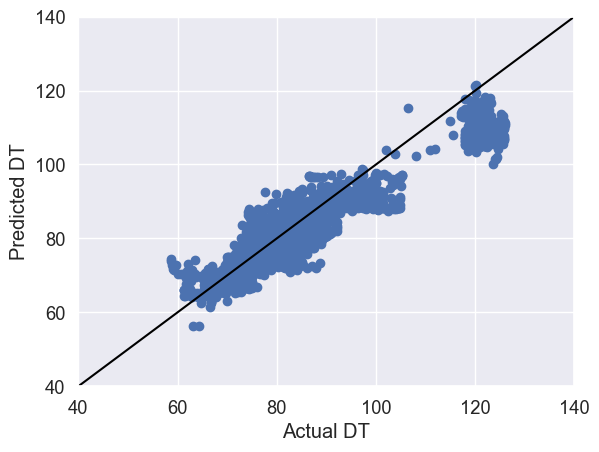

In [45]:
plt.scatter(test_df['DT'], test_df['TEST_DT'])
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line

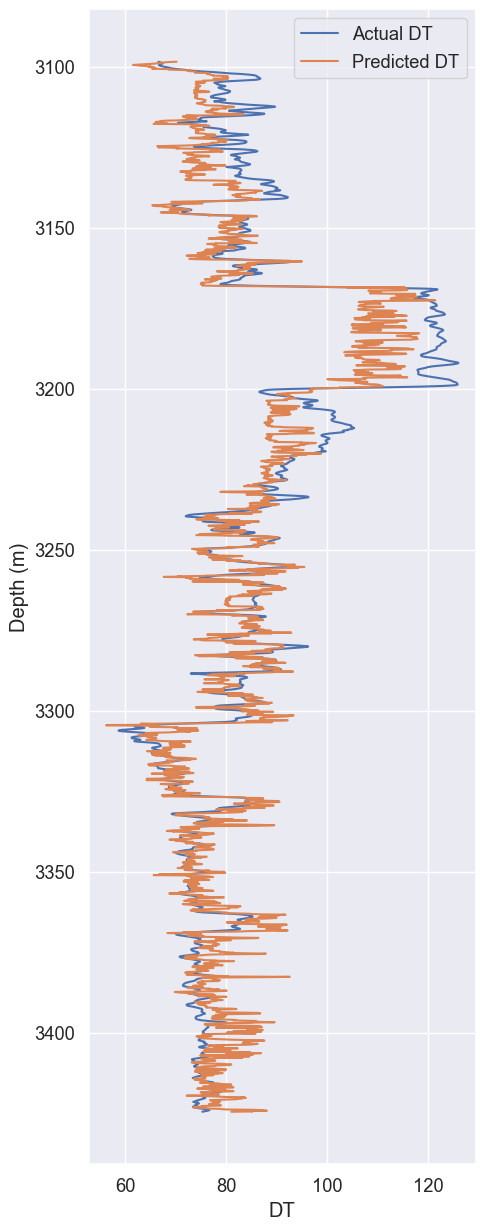

In [87]:
plt.figure(figsize=(5, 15))
plt.plot(test_df['DT'],test_df['DEPTH'],label='Actual DT')
plt.plot(test_df['TEST_DT'],test_df['DEPTH'],label='Predicted DT')
plt.gca().invert_yaxis()  # 👈 Đảo ngược trục Y
plt.xlabel('DT')
plt.ylabel('Depth (m)')
# plt.ylim(40, 140)
plt.legend()
plt.grid(True)

## OOP SOLUTION

## BUILD MACHINE LEARNING CLASS ALLOW:
*   Input--> excel file-->(path)
*   Data analyis
*   Extract features
*   Select models-->test list of models
*   Export accuracy result

In [98]:
DecisionTreeClassifier().__class__.__name__

'DecisionTreeClassifier'

In [ ]:
class MachineLearning:
    
    def __init__(self,file:str,model_list:list):
        self.df=pd.read_csv(file)
        self.model_list=model_list
    def define_model(self,X_cols:list[str],y_col:list[str],test_size=0.2):
        X=self.df[X_cols]
        y=self.df[y_col]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size)
    def check_data(self):
        return self.df.describe()
    def data_info(self):
        return self.df.info()
    def plot_histogram(self,curve_name:str,bins=50):
        import seaborn as sns
        return  sns.histplot(self.df[curve_name],kde=True,bins=bins)
    
    def plot_heatmap(self):
        fg, ax=plt.subplots(figsize=(10,8))
        # sns.set(font_scale=2)
        # df_qc = pd.read_csv('QC_New.csv')#Seismic dat
        df_qc = self.df.copy()#Seismic dat
        corr_data=df_qc.corr()# for input
        # corr_data=df_qc.corr() # for QC output
        ones_corr=np.ones_like(corr_data,dtype=bool)
        mask=np.triu(ones_corr)
        # Remove first row and last col
        adjusted_mask=mask[1:, :-1] 
        adjusted_corr_data=corr_data.iloc[1:, :-1]
        cmap=sns.diverging_palette(0,230,90,60,as_cmap=True)
        sns.heatmap(data=adjusted_corr_data,mask=adjusted_mask,annot=True,annot_kws={'fontsize':25},fmt='.2f',
                    cmap=cmap,vmin=-1,vmax=1,linecolor='white',linewidths=0.5)
        yticks=[i.upper() for i in adjusted_corr_data.index]
        xticks=[i.upper() for i in adjusted_corr_data.columns]
        ax.set_yticklabels(yticks,rotation=0,fontsize=15)
        ax.set_xticklabels(xticks,rotation=0,fontsize=15)
        
    def pair_plot(self, hue:str="Facies"):        
        sns.pairplot(self.df,hue=hue)
        
    def train_and_evaluate(self):
        for model in self.model_list:
            model.fit(self.X_train,self.y_train.values.ravel())
            y_pred=model.predict(self.X_test)
            score=accuracy_score(self.y_test,y_pred)
            print(f"Model {model.__class__.__name__} with score {score}")

In [166]:
file="../data/seismic_logdata.csv"
model_list=[DecisionTreeClassifier(),RandomForestClassifier()]
# Select inputs and target
X_cols = ['LR', 'VpVs', 'MR',"Den","Zp"]
y_cols = ['Facies']

In [167]:
ml=MachineLearning(file=file,model_list=model_list)

In [168]:
ml.check_data()

,Zp,LR,VpVs,MR,Den,Facies
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,7441.810503,23.461493,1.873871,15.974321,2.435965,0.416667
std,144.621452,3.187332,0.095621,2.027564,0.060440,0.493120
min,7118.852051,16.727655,1.684796,12.909870,2.302012,0.000000
25%,7326.183838,20.876460,1.789218,14.354527,2.379463,0.000000
50%,7470.019043,24.447998,1.902304,15.468707,2.454135,0.000000
75%,7546.404541,25.866514,1.959643,17.724279,2.483756,1.000000
max,7819.441406,28.977602,2.014785,20.238968,2.542992,1.000000


In [169]:
ml.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zp      2184 non-null   float64
 1   LR      2184 non-null   float64
 2   VpVs    2184 non-null   float64
 3   MR      2184 non-null   float64
 4   Den     2184 non-null   float64
 5   Facies  2184 non-null   float64
dtypes: float64(6)
memory usage: 102.5 KB


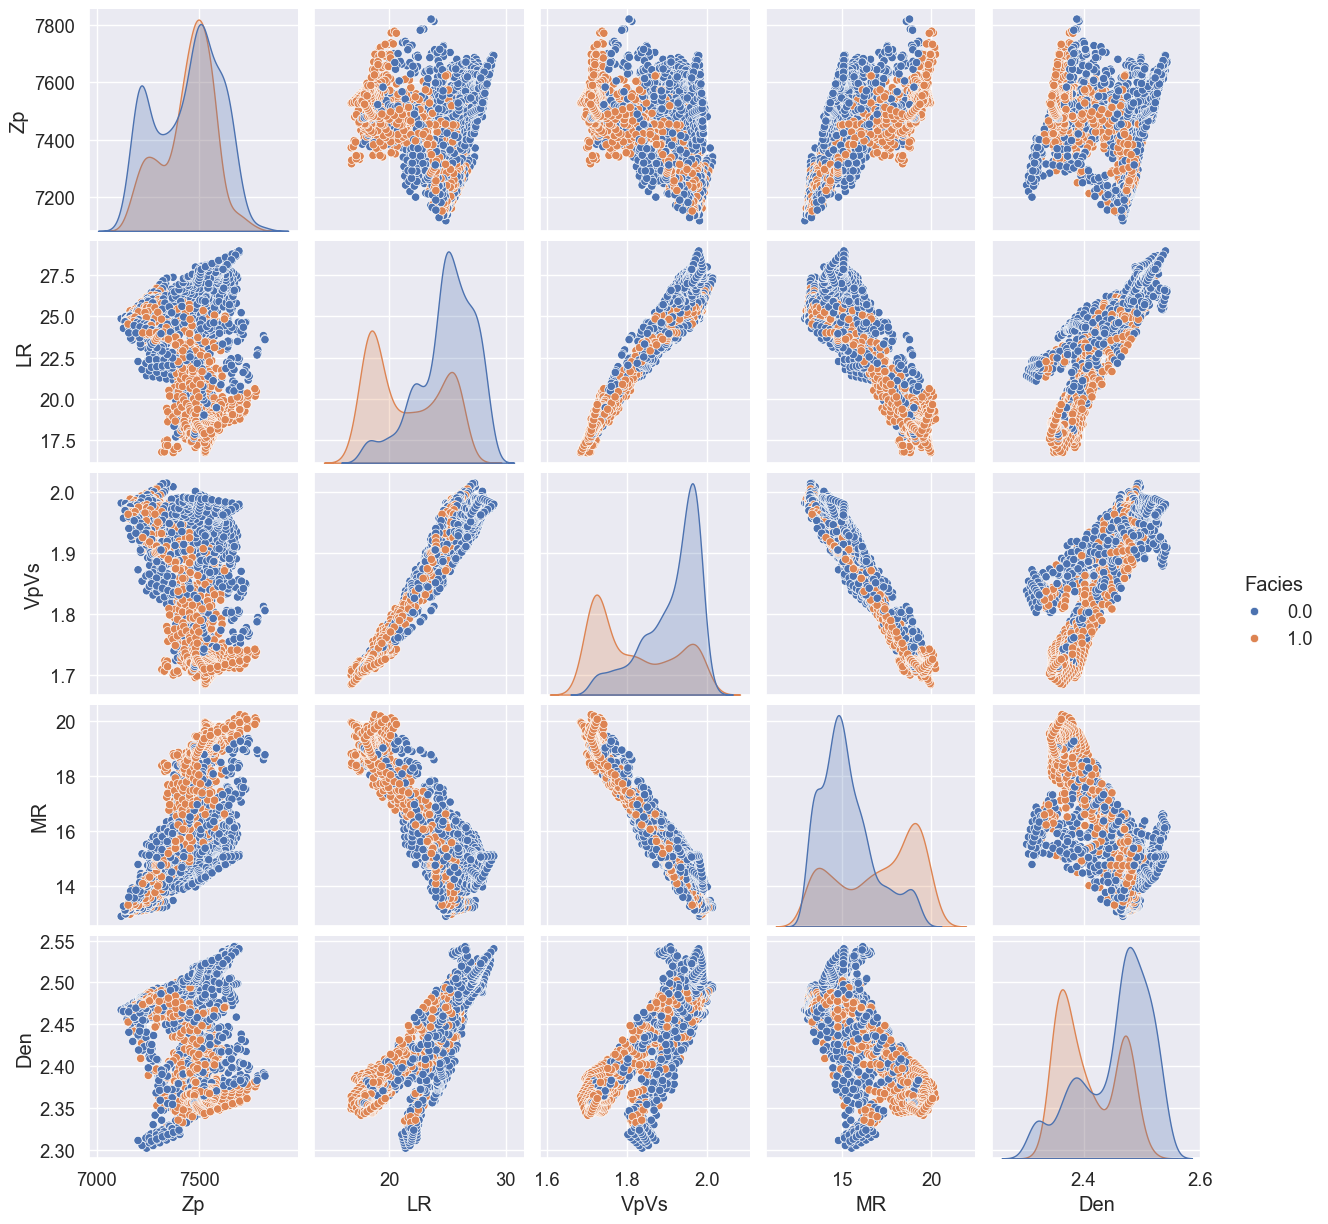

In [171]:
ml.pair_plot()

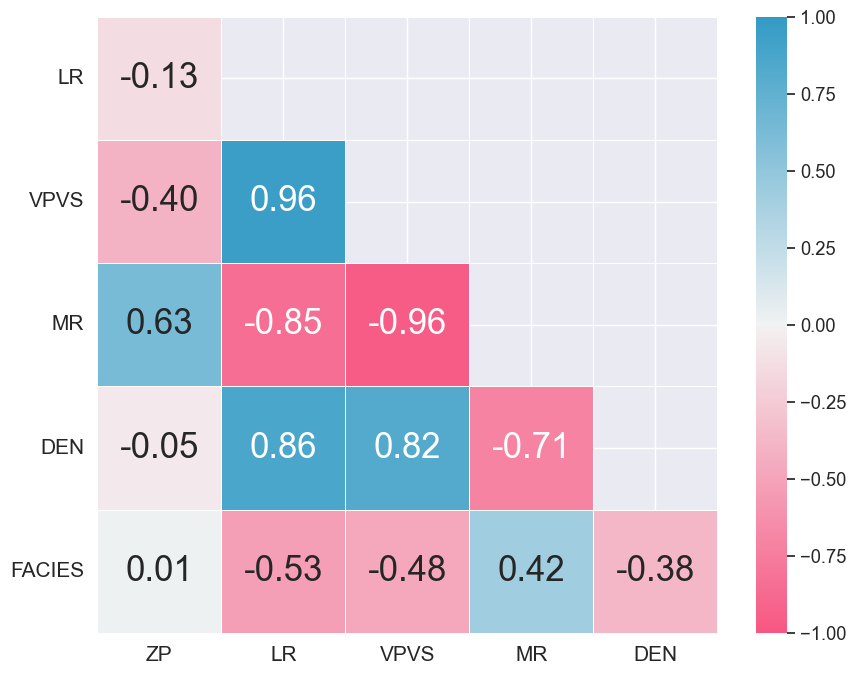

In [172]:
ml.plot_heatmap()

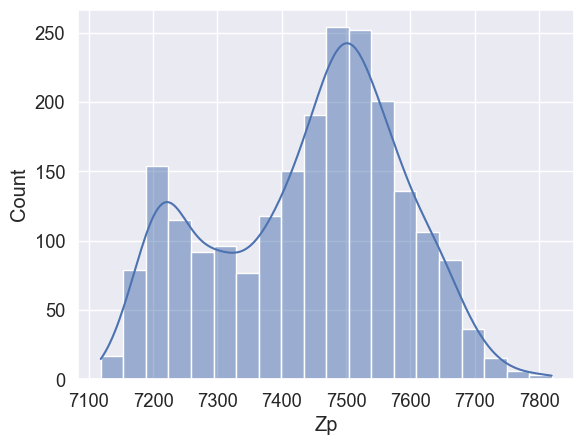

In [170]:
ml.plot_histogram("Zp",bins=20);

In [134]:
ml.define_model(X_cols,y_cols)

In [135]:
ml.train_and_evaluate()

Model DecisionTreeClassifier with score 0.7780320366132724
Model RandomForestClassifier with score 0.816933638443936


In [130]:
ml.y_train.values.ravel()

array([1., 0., 0., ..., 0., 1., 1.])